# Data on ion-exchange membrane fouling by humic acid during electrodialysis

Bram De Jaegher <sup>a,b,c,∗</sup>, Eneko Larumbe <sup>c</sup>, Wim De Schepper<sup>c</sup>, Arne Verliefde<sup>b</sup>, Ingmar Nopens<sup>a</sup>

<sup>a</sup> BIOMATH, Department of Data Analysis and Mathematical Modelling, Ghent University, Coupure links 653, 9000 Ghent, Belgium

<sup>b</sup> PaInT, Department of Green chemistry and Technology, Ghent University, Coupure links 653, 9000 Ghent, Belgium

<sup>c</sup> Flemish Institute for Technological Research (VITO), Boeretang 200, 2400 Mol, Belgium

*Corresponding author(s)*

<sup>*</sup>Bram De Jaegher (<a href="mailto:Bram.DeJaegher@UGent.be">Bram.DeJaegher@UGent.be </a>) – Coupure links 653, 9000 Ghent, Belgium

**Cite this work as:**
> De Jaegher, B., Larumbe, E., De Schepper, W., Verliefde, A., & Nopens, I. (2020). Data on ion-exchange membrane fouling by humic acid during electrodialysis. Data in Brief, 31, 105763. [doi:10.1016/j.dib.2020.105763](
https://doi.org/10.1016/j.dib.2020.105763)


**This is the dataset used in:**
> De Jaegher, B. ,Larumbe, E.,De Schepper, W., Verliefde, A., & Nopens, I. (2020). Colloidal fouling in electrodialysis: a neural differential equations model. Separation and Purification Technology, 116939. https://doi.org/10.1016/j.seppur.2020.116939

##  What is this data?

This data paper aims to provide data on the effect of the process settings on the fouling of an electrodialysis pilot installation treating a sodium chloride solution in the presence of humic acid. This data was used by “Colloidal fouling in electrodialysis: a neural differential equations model” [1] to construct a predictive model and provides interpretive insights into this dataset. During the experiments, the electrical resistance over the electrodialysis stack was monitored while varying the crossflow velocity in the compartments, the current applied to the stack and the salt concentration in the incoming stream. The active cycle was maintained for a maximum of 1.5h after which the polarity was reversed to remove the fouling layer and clean the pilot. Additional data is gathered such as the temperature, pH, flow rate, conductivity, pressure in the different compartments of the electrodialysis stack. The data is processed to remove the effect of temperature fluctuations and some filtering is performed. To maximise the reuse potential of this dataset, both raw and processed data are provided along with a detailed description of the pilot installation and sensor locations. The data generated can be useful for researchers and industry working on electrodialysis fouling and the modelling thereof. The availability of conductivity and pH in all compartments is useful to investigate secondary effects of humic acid fouling such as the eventual decrease in membrane permselectivity or water splitting effects introduced by the fouling layer.

## How is the data acquired?



The data consist of time series of an electrodialysis pilot installation that processes a sodium chloride solution with humic acid and is subject to fouling.  Each of the experiments is performed at a different crossflow velocity, applied current and the salt concentration in the fouling solution, following an experimental design. Different inline sensors monitor the state of the ED pilot;

*	Electric potential (M 3000 - Delta electronika, the Netherlands)
*	Conductivity & temperature (Indumax CLS50D - Endress + Hauser, USA)
*	Flow rate (Promag 55S DN15 - Endress + Hauser, USA)
*	pH (Orbisint CPS11D - Endress + Hauser, USA)
*	Pressure (Cerabar MPMC51 – Endress + Hauser, USA)

## Reading raw data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set(style="ticks",font_scale=1.5)

In [2]:
figPath = "figs/"

Get data from zenodo 

In [3]:
url = "https://zenodo.org/record/3551928/files/dataRaw.csv"
dataDF = pd.read_csv(url)    # read DOE

## Configuration

**Font size**

## Raw data

The main focus of the experiments was to capture the evolution of the electric potential over the ED stack 

### Electric potential 

This code plots the evolution of the electric potential for all experimental conditions

In [48]:
import itertools           
cmap="Greens"                         # color map
sns.set(style="ticks",font_scale=1.5) # Set tick style

In [49]:
dataDF = dataDF[dataDF['Ustack']<=13.9] # Clipping fouling curves

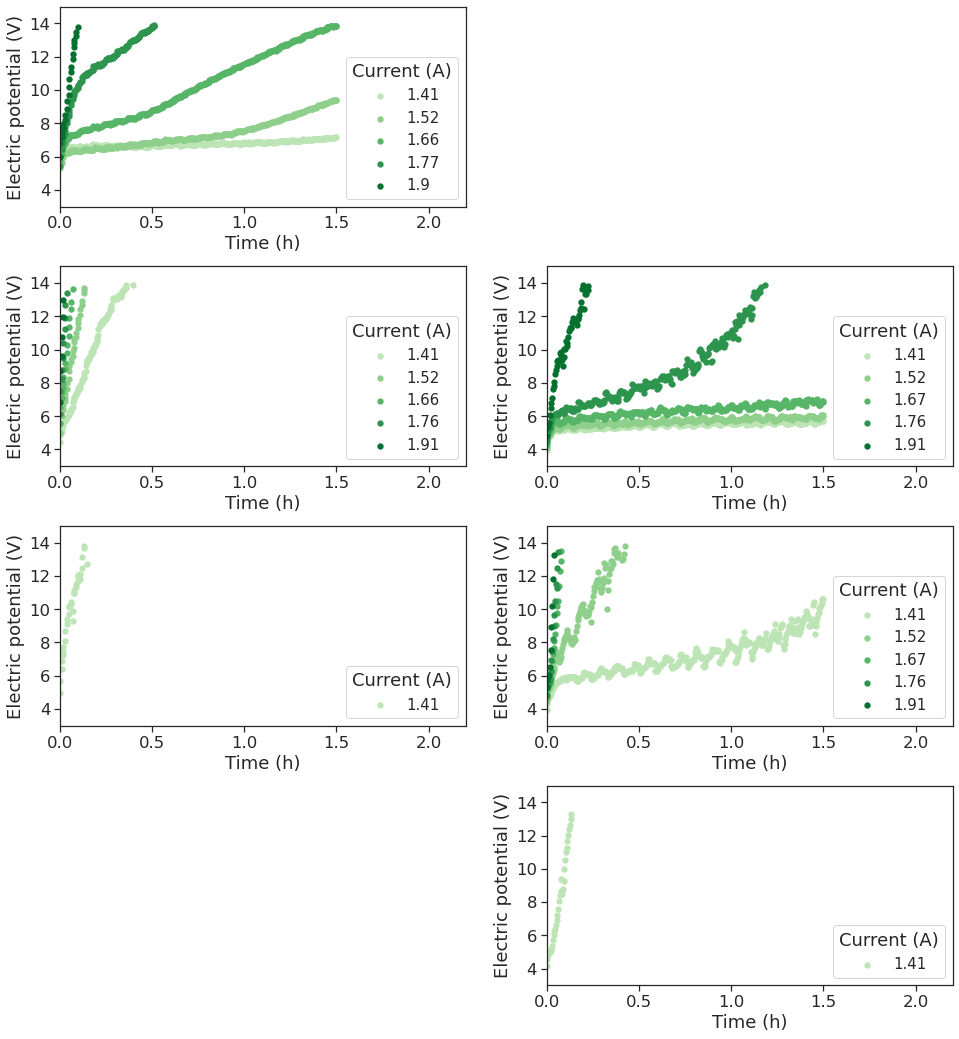

In [50]:
f, axes = plt.subplots(4,2,figsize=(16, 18))
# 0.1M NaCl & 3.5

sliceDF = dataDF[(dataDF["Ce"]==0.1) & (dataDF["v"]==3.5)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

palette = itertools.cycle(sns.color_palette(cmap, n_colors=len(Is)+1))
next(palette); # Remove lightest color 

for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[0,0],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[0,0].set_xlim((0,2.2))
    axes[0,0].set_ylim((3,15))
    axes[0,0].legend(title="Current (A)", loc=4, fontsize='small')
    axes[0,0].set_ylabel("Electric potential (V)")
    axes[0,0].set_xlabel("Time (h)")

# 0.1M NaCl & 3.0
sliceDF = dataDF[(dataDF["Ce"]==0.1) & (dataDF["v"]==3.0)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

palette = itertools.cycle(sns.color_palette(cmap, n_colors=len(Is)+1))
next(palette); # Remove lightest color 

for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[1,0],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[1,0].set_xlim((0,2.2))
    axes[1,0].set_ylim((3,15))
    axes[1,0].legend(title="Current (A)", loc=4, fontsize='small')
    axes[1,0].set_ylabel("Electric potential (V)")
    axes[1,0].set_xlabel("Time (h)")

    
# 0.1M NaCl & 2.5
sliceDF = dataDF[(dataDF["Ce"]==0.1) & (dataDF["v"]==2.5)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

next(palette)
for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[2,0],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[2,0].set_xlim((0,2.2))
    axes[2,0].set_ylim((3,15))
    axes[2,0].legend(title="Current (A)", loc=4, fontsize='small')
    axes[2,0].set_ylabel("Electric potential (V)")
    axes[2,0].set_xlabel("Time (h)")
  
 
# 0.2M NaCl & 3.5
sliceDF = dataDF[(dataDF["Ce"]==0.2) & (dataDF["v"]==3.0)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

palette = itertools.cycle(sns.color_palette(cmap, n_colors=len(Is)+1))
next(palette);
for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[1,1],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[1,1].set_xlim((0,2.2))
    axes[1,1].set_ylim((3,15))
    axes[1,1].legend(title="Current (A)", loc=4, fontsize='small')
    axes[1,1].set_ylabel("Electric potential (V)")
    axes[1,1].set_xlabel("Time (h)")

# 0.1M NaCl & 3.0
sliceDF = dataDF[(dataDF["Ce"]==0.2) & (dataDF["v"]==2.5)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

palette = itertools.cycle(sns.color_palette(cmap, n_colors=len(Is)+1))
next(palette);
for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[2,1],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[2,1].set_xlim((0,2.2))
    axes[2,1].set_ylim((3,15))
    axes[2,1].legend(title="Current (A)", loc=4, fontsize='small')
    axes[2,1].set_ylabel("Electric potential (V)")
    axes[2,1].set_xlabel("Time (h)")
    
# 0.1M NaCl & 2.5
sliceDF = dataDF[(dataDF["Ce"]==0.2) & (dataDF["v"]==2.0)]
Is = sliceDF[sliceDF["I"]>0]["I"].unique()

next(palette)

for I in Is:
    tempDF = sliceDF[sliceDF["I"]==I]
    sns.scatterplot(x="Time per cicle (h)", y="Ustack", data=tempDF, ax=axes[3,1],
                        linewidth=0, s=40, color=next(palette), label=I)
    axes[3,1].set_xlim((0,2.2))
    axes[3,1].set_ylim((3,15))
    axes[3,1].legend(title="Current (A)", loc=4, fontsize='small')
    axes[3,1].set_ylabel("Electric potential (V)")
    axes[3,1].set_xlabel("Time (h)")

    
axes[3,0].axis('off')
axes[0,1].axis('off')

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

name = 'dataOverview'
f.savefig(figPath + name + '.svg')
f.savefig(figPath + name + '.pdf')
f.savefig(figPath + name + '.png', dpi = 300)
plt.show()

### Other sensor data
Next to the stack potential, the temperature, pH, flow rate, conductivity, pressure and electric potential are measured at several locations in the pilot installation, a detailed overview of the sensor locations is shown in the figure below.

<img src="figs/PID.jpg" width = 60%>

Details of the sensors used is provided in the table below.

| Parameter | Identifiers |	Manufacturer | Unit |
| --------- | ----------  | -----------  | -----|
| Electric potential 	| EPx	  | M 3000 - Delta electronika, the Netherlands	  | (V) |
| Conductivity	      | COx	  | Indumax CLS50D - Endress + Hauser, USA	  | (mS/cm) |
| Temperature	        | TITx	| Indumax CLS50D - Endress + Hauser, USA	  | (°C) |
| pH	                | PHx	  | Orbisint CPS11D - Endress + Hauser, USA	  | (-) |
| Flowrate	          | FITx	| Promag 55S DN15 - Endress + Hauser, USA	  | (l/h) |
| Pressure	          | PITx	| Cerabar MPMC51 – Endress + Hauser, USA	  | (bar) |


A subset of the data is illustrated below, where three reversal cycles are displayed at an increasing current and the some of the sensors mentioned previously are plotted. 

In [7]:
import warnings   # sneaky ignore of my bad Pandas skills
warnings.filterwarnings("ignore") 

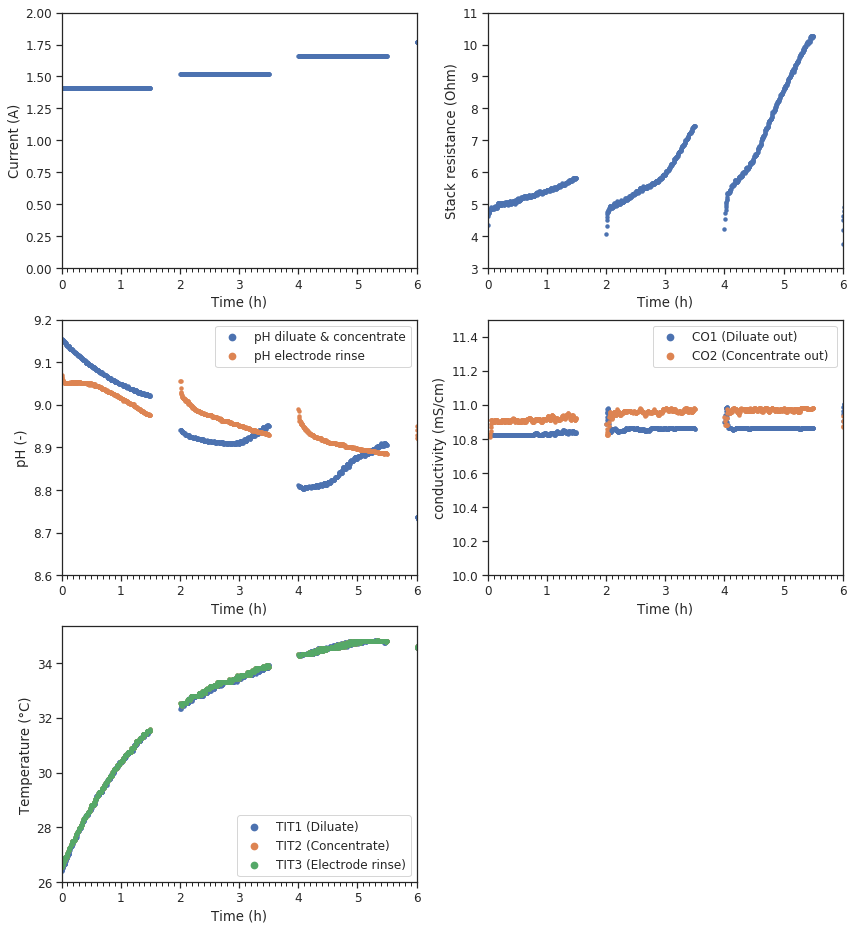

In [8]:
dataDF = dataDF.loc[dataDF["I"]>0.2]
sliceDF = dataDF.loc[(dataDF["Ce"]==0.1) & (dataDF["v"]==3.5)]

f, axes = plt.subplots(3,2,figsize=(14, 16))
sns.scatterplot(x="Time (h)", y="I", data=sliceDF, ax=axes[0,0],linewidth=0, s=20)
axes[0,0].set_xlim((0,6))
axes[0,0].set_ylim((0,2.0))
axes[0,0].set(ylabel='Current (A)')
axes[0,0].set_xticks(np.arange(0,60)/10, minor=True);

sns.scatterplot(x="Time (h)", y="Rlinear", data=sliceDF, ax=axes[0,1],linewidth=0, s=20)
axes[0,1].set_xlim((0,6))
axes[0,1].set_ylim((3,11))
axes[0,1].set(ylabel='Stack resistance (Ohm)')
axes[0,1].set_xticks(np.arange(0,60)/10, minor=True);

sns.scatterplot(x="Time (h)", y="PH1", data=sliceDF, ax=axes[1,0], label=r"pH diluate & concentrate",linewidth=0, s=20)
sns.scatterplot(x="Time (h)", y="PH3", data=sliceDF, ax=axes[1,0], label=r"pH electrode rinse",linewidth=0, s=20)
axes[1,0].set_xlim((0,6))
axes[1,0].set_ylim((8.6,9.2))
axes[1,0].set(ylabel='pH (-)')
axes[1,0].set_xticks(np.arange(0,60)/10, minor=True);
lgnd = axes[1,0].legend()
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]

sliceDF["CO1RA"] = sliceDF["CO1"].rolling(window=10, center = False).mean().copy()
sliceDF["CO2RA"] = sliceDF["CO2"].rolling(window=10, center = False).mean().copy()
sns.scatterplot(x="Time (h)", y="CO1RA", data=sliceDF, ax=axes[1,1], label=r"CO1 (Diluate out) ",linewidth=0, s=20)
sns.scatterplot(x="Time (h)", y="CO2RA", data=sliceDF, ax=axes[1,1], label=r"CO2 (Concentrate out) ",linewidth=0, s=20)
axes[1,1].set_xlim((0,6.0))
axes[1,1].set_ylim((10,11.5))
lgnd = axes[1,1].legend()
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]

axes[1,1].set(ylabel='conductivity (mS/cm)')
axes[1,1].set_xticks(np.arange(0,60)/10, minor=True);

sns.scatterplot(x="Time (h)", y="TIT1", data=sliceDF, ax=axes[2,0], label=r"TIT1 (Diluate)",linewidth=0, s=20)
sns.scatterplot(x="Time (h)", y="TIT2", data=sliceDF, ax=axes[2,0], label=r"TIT2 (Concentrate)",linewidth=0, s=20)
sns.scatterplot(x="Time (h)", y="TIT2", data=sliceDF, ax=axes[2,0], label=r"TIT3 (Electrode rinse)",linewidth=0, s=20)
axes[2,0].set_xlim((0,6))
axes[2,0].set(ylabel='Temperature (°C)')
axes[2,0].set_xticks(np.arange(0,60)/10, minor=True);
lgnd = axes[2,0].legend()
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

axes[2,1].axis('off')

# Saving figures
name = 'sensorOverview2'
f.savefig(figPath + name + '.svg')
f.savefig(figPath + name + '.pdf')
f.savefig(figPath + name + '.png', dpi = 300)

## Data processing and filtering

The data processing and filtering is done in a few steps,

1. Smooth (simple moving average)
2. Resample so that each curve has the same number of time points and to reduce the size of the dataset
2. Rename columns to simple names

**Function definitions**

In [9]:
def balanceDatapoints(df,nPoints):
    """Resamples the dataframe to spread nPoints over the entire timeseries"""
    newPoints = np.linspace(0,len(df)-1,nPoints)
    newPoints = [int(newPoint) for newPoint in newPoints]
    return df.iloc[newPoints, :]

In [10]:
smoothWindow = 10 # window size for smoother
nPoints = 20      # number of datapoints retained for each timeseries
listDF = []       # dataFrame list

In [11]:
expTriggers = dataDF[dataDF["Time per step (min)"]<1e-9].index

for index,expTrigger in enumerate(expTriggers[1:-1]):
    df = dataDF.loc[expTriggers[index-1]:expTriggers[index]]

    if (len(df)-smoothWindow) > nPoints:                
        df = df.rolling(smoothWindow, center=False).mean().dropna()  # smooth
        
    if len(df)>= nPoints:                               # if there are more not enough points redistribution
        df = balanceDatapoints(df,nPoints)             # redistribute nPoints
    
    listDF += [df]
    
# add final experiments
df = dataDF.loc[expTriggers[-1]::]
if (len(df)-smoothWindow) > nPoints:                # if there are more not enough points skip smoothing
    df = df.rolling(smoothWindow).mean().dropna()   # smooth

if len(df)>= nPoints:                               # if there are more not enough points redistribution
     df = balanceDatapoints(df,nPoints)             # redistribute nPoints

listDF += [df]

dataDFNew = pd.concat(listDF)
dataDFNew[["Ce","I","v"]] = dataDF.loc[dataDFNew.index][["Ce","I","v"]]  #restore input values

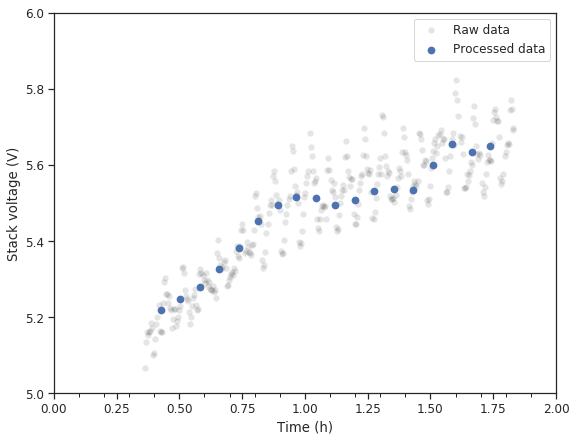

In [12]:
sliceDF = dataDF[(dataDF["Ce"]==0.2) & (dataDF["v"]==3.0) & (dataDF["I"]==1.41) ] 
sliceDFProcessed = dataDFNew[(dataDFNew["Ce"]==0.2) & (dataDFNew["v"]==3.0)& (dataDFNew["I"]==1.41)]

f, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x="Time (h)", y="Ustack", data=sliceDF, ax=ax,linewidth=0, 
                s=40, color="black", alpha = 0.1, label="Raw data")
sns.scatterplot(x="Time (h)", y="Ustack", data=sliceDFProcessed, ax=ax,linewidth=0, 
                s=60, label="Processed data")

ax.set_ylim([5,6])
ax.set_xlim([0,2])
ax.set(ylabel='Stack voltage (V)')
ax.set_xticks(np.arange(0,20)/10, minor=True);
ax.legend()

## Export processed data

In [14]:
outputFolder = "data/processed/"

In [15]:
dataDFNew.to_csv(outputFolder + "dataset.csv")

## References

[1]  De Jaegher B., De Schepper W., Verliefde A., Nopens I., C, Colloidal fouling in electrodialysis: a neural differential equations model, Desalination, In Press.